# Machine Learning I Homework

### 1. (Fake) Titanic Data Classification.

The file 'titanicMachLearn.csv' contains (fake) data showing an SES (socioeconomic status) measure, fare paid for the ticket, and whether the person survived or not. Our goal is to see if we can classify survival status based upon SES and fare.

**1a.** Do a k=3 nearest neighbor classification on the data using an 80/20 training/test split. Summarize the performance of the classifier.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression              # for simulating data
from sklearn.model_selection import train_test_split      # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [131]:
titanic = pd.read_csv("data/titanicMachLearn.csv")
titanic.head(5)

,SES,Fare,Survived
0,39,15,0
1,83,33,1
2,98,25,1
3,67,33,1
4,36,14,0


In [132]:
X = titanic[['SES', 'Fare']]
y = titanic['Survived']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [134]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [135]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [136]:
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score}%")

Accuracy Score: 1.0%


An accuracy score of 1.0% means that all predictions made by SES and Fare match the actual surivived labels in the test set. In other words, SES and Fare were able to perfectly classify people into survived or not survived.

**1b.** Make a scatter plot of the data with color showing the survival status. Does the plot intuitivly agree with the performance of your classifier?

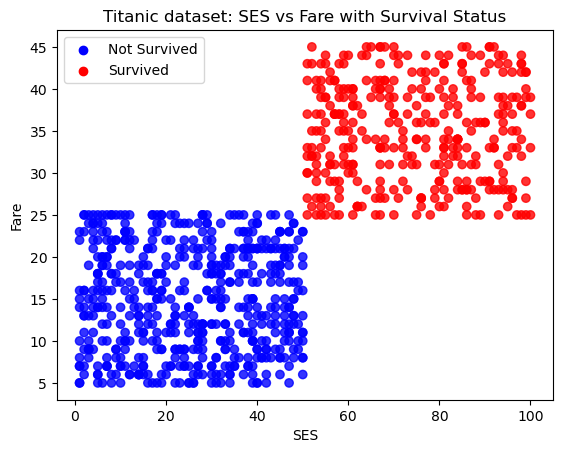

In [137]:
# assign survived and not survived colors
colors = []
for i in range(len(y)):
    if y[i] == 0:
        colors.append('blue')
    else:
        colors.append('red')

# Create scatter plot
plt.scatter(X['SES'], X['Fare'], color = colors, alpha=0.8)
plt.xlabel('SES')
plt.ylabel('Fare')

# Add legend for colors
plt.scatter([], [], color='blue', label='Not Survived')
plt.scatter([], [], color='red', label='Survived')
plt.legend(loc = "upper left")

plt.title('Titanic dataset: SES vs Fare with Survival Status')
plt.show()


The plot does intuitively agree with the performance of my classifer because there is a perfect relationship between SES vs. Fare and survival status, so the data points on the plot that represent survived should not be in the same region as the data points that represent not survived, which matches the plot above.

### 2. Iris Data Classification.

Do a nearest neighbors classification on the iris data using the 2 variables you think would work best based on the pair-pair plot we did in the tutorial (i.e. don't use the same variables we used for classification in the tutorial).

Compare the results with the results we got in the tutorial.

In [120]:
from sklearn.datasets import load_iris
iris = load_iris()

In [121]:
X = iris.data[:, [0,-1]]  # want to compare sepal length vs. petal width
y = iris.target

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [123]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [124]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [125]:
y_pred = knn.predict(X_test)

In [126]:
# assess performance of classifer

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

Accuracy Score: 0.97%


It was a lot more accurate using sepal length vs. petal width to classify the flowers compared to using sepal length vs. sepal width in the tutorial. The accuracy score of sepal length vs. petal width was 0.97% while the accuracy score for sepal length vs. sepal width was lower at 0.77%.